In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')
dataset

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [3]:
dataset.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [4]:
dataset.shape

(913000, 4)

In [5]:
dataset.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [6]:
dataset.iloc[912990:913001]

,date,store,item,sales
912990,2017-12-22,10,50,75
912991,2017-12-23,10,50,70
912992,2017-12-24,10,50,76
912993,2017-12-25,10,50,51
912994,2017-12-26,10,50,41
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [7]:
dataset = pd.DataFrame(dataset)
print(dataset.dtypes)

date     object
store     int64
item      int64
sales     int64
dtype: object


In [8]:
dataset['date'] = pd.to_datetime(dataset['date'] , format='%Y-%m-%d')

In [9]:
print(dataset.dtypes)

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object


In [10]:
dataset.describe()

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


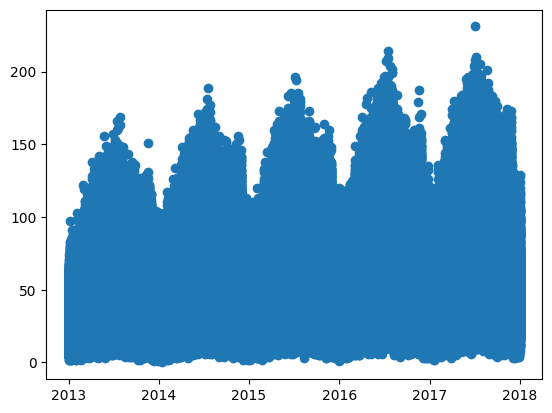

In [11]:
plt.scatter(dataset.date , dataset.sales)

In [12]:
dataset_series = dataset.loc[(dataset["item"] == 1)& (dataset["store"] == 1)]

In [13]:
dataset_series.set_index('date' , inplace=True)

In [14]:
dataset_series

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,1,1,14
2017-12-28,1,1,19
2017-12-29,1,1,15


In [15]:
dataset_series.index[-1]

Timestamp('2017-12-31 00:00:00')

In [16]:
dataset_series

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,1,1,14
2017-12-28,1,1,19
2017-12-29,1,1,15


In [17]:
dataset_test = dataset_series['sales']
dataset_test

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, Length: 1826, dtype: int64

In [18]:
from statsmodels.tsa.stattools import acf
acf_values = acf(dataset_test , nlags=100)

In [19]:
acf_values

array([ 1.        ,  0.44753889,  0.36549498,  0.34473438,  0.35158622,
        0.37197021,  0.42603162,  0.56853023,  0.41335624,  0.35254973,
        0.33365091,  0.31591968,  0.34062088,  0.40474268,  0.54678032,
        0.40062628,  0.32876506,  0.29759713,  0.31015632,  0.32741344,
        0.38989153,  0.50695749,  0.39525398,  0.30890595,  0.27031251,
        0.28404964,  0.29092663,  0.35964954,  0.49039304,  0.3649517 ,
        0.28291225,  0.2205857 ,  0.23994405,  0.26783177,  0.33182887,
        0.45632411,  0.3007746 ,  0.26535974,  0.2351675 ,  0.23261251,
        0.25053077,  0.32242227,  0.44609308,  0.29207154,  0.23589025,
        0.19278358,  0.19493235,  0.22364793,  0.27892757,  0.40331154,
        0.24527665,  0.21295146,  0.17532029,  0.16992057,  0.19427002,
        0.24791939,  0.38716191,  0.24264608,  0.17081382,  0.13976785,
        0.15293686,  0.17799775,  0.21758372,  0.33237998,  0.21397896,
        0.16024757,  0.10642245,  0.12809016,  0.13463848,  0.19

In [20]:
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(dataset_test)
pacf_values

array([ 1.        ,  0.44778411,  0.20686344,  0.16036306,  0.15359259,
        0.15802952,  0.20555059,  0.36987473,  0.05477601,  0.02370963,
        0.01717556, -0.020309  ,  0.010812  ,  0.07432051,  0.23911946,
        0.02088666, -0.01718008, -0.03615691,  0.00322848, -0.00394863,
        0.0391558 ,  0.13935111,  0.03234523, -0.03090803, -0.05260017,
       -0.01954543, -0.0425798 ,  0.007933  ,  0.12815586, -0.00290342,
       -0.03003609, -0.09062208, -0.05340838])

In [23]:
from statsmodels.tsa.stattools import adfuller

In [52]:
def ad_test(dataset):
    
        dftest = adfuller(dataset , autolag='AIC')
        print('1. ADF :' , dftest[0])
        print('2. P-Value :' , dftest[1])
        print('3. No. of lags :',  dftest[2])
        print('4. No. of observations used for ADF and Crital value calculations  :' , dftest[3])
        print('5. Critical Values :' , dftest[4])
    

In [53]:
ad_test(dataset_series['sales'])

1. ADF : -3.157670556332791
2. P-Value : 0.022569380626572377
3. No. of lags : 23
4. No. of observations used for ADF and Crital value calculations  : 1802
5. Critical Values : {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}


 P-Value : 0.022569380626572377

 This P-Value signifies if there is seasonality in the data.


 If P-value is smaller there is no seasonality.


 Generally P-value <=0.05 means no seasonality.

 As the P-value is close to 0.05 this could have some seasonality pattern but is not quite significant.

##Now to finding out the Order of the ARIMA model

In [26]:
from pmdarima import auto_arima

#Ignore Harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
print(dataset_series.shape)
train = dataset_series.iloc[: -182]
test = dataset_series.iloc[-182:]

print(train.shape)
print(test.shape)

(1826, 3)
(1644, 3)
(182, 3)


In [28]:
train

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-06-28,1,1,50
2017-06-29,1,1,28
2017-06-30,1,1,28


In [29]:
train = train.drop(['store' , 'item'] , axis =1)

In [30]:
train_df = pd.DataFrame(train)

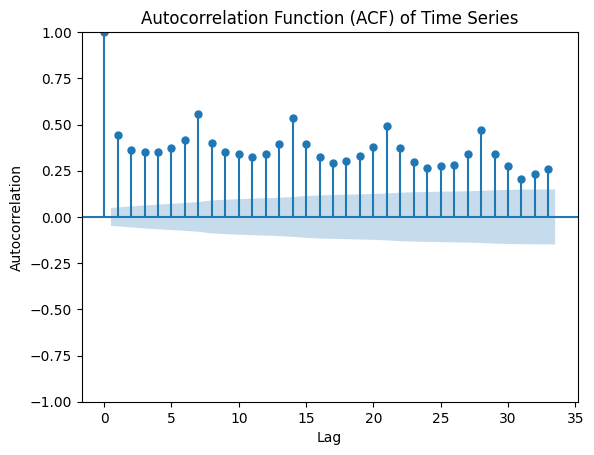

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train['sales'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Time Series')
plt.show()

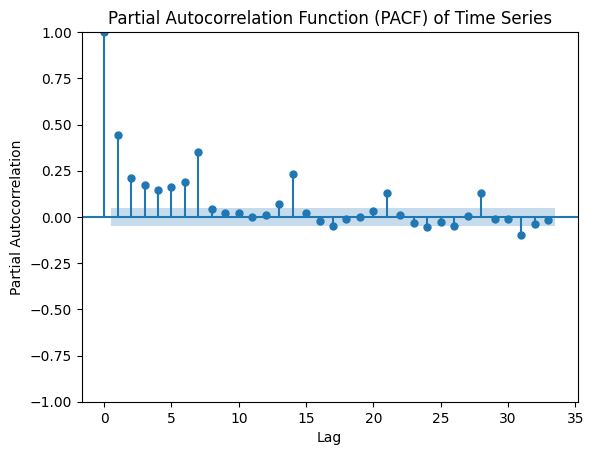

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train['sales'])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Time Series')
plt.show()

In [33]:
model = auto_arima(train['sales'] , trace =True , suppress_warnings = True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10164.158, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11070.246, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10736.184, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10170.525, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11068.254, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10162.316, Time=1.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10166.229, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10167.118, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10141.241, Time=1.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10160.183, Time=2.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9991.894, Time=2.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10139.240, Time=2.68 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=10143.279, Time=1.88 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=10138.575, Time=1.16 sec
 ARIMA(3,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1644
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -4949.196
Date:                Wed, 16 Aug 2023   AIC                           9918.392
Time:                        15:46:01   BIC                           9972.435
Sample:                    01-01-2013   HQIC                          9938.434
                         - 07-02-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5317      0.025    -21.019      0.000      -0.581      -0.482
ar.L2          0.2662      0.013     20.375      0.000       0.241       0.292
ar.L3         -0.5923      0.012    -50.993      0.000      -0.615      -0.569
ar.L4         -0.9452      0.024    -40.095      0.000      -0.991      -0.899
ma.L1         -0.3753      0.033    -11.339      0.000      -0.440      -0.310
ma.L2         -0.7784      0.042    -18.551      0.000      -0.861      -0.696
ma.L3          0.8438      0.025     33.488      0.000       0.794       0.893
ma.L4          0.3858      0.039      9.963      0.000       0.310       0.462
ma.L5         -0.8221      0.029    -28.082      0.000      -0.880      -0.765
sigma2        23.8439      0.734     32.499      0.000      22.406      25.282
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                32.71
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the output of auto_arima model we can see that our model has some seasonality. As it recommends 1st order Differencing.

In [34]:
print(len(train))
print(len(test))

1644
182


In [35]:
days = train.index[-1]
days

Timestamp('2017-07-02 00:00:00')

In [36]:
import datetime

In [37]:
t = dataset_series.index[-1]
end_date = datetime.date(2018, 12, 25)
days1 = end_date - t.date()
print(days1)
print(t)
days1.days


359 days, 0:00:00
2017-12-31 00:00:00


359

In [38]:
len(test)

182

In [39]:
start = len(train)
end = len(train) + len(test) -1

predictions = model.predict(n_periods = 182 ,start =start , end = end, typ ='levels')

In [40]:
predictions

2017-07-03    29.774711
2017-07-04    26.941354
2017-07-05    28.564267
2017-07-06    29.782425
2017-07-07    31.476393
                ...    
2017-12-27    28.551876
2017-12-28    30.036218
2017-12-29    31.391688
2017-12-30    31.642014
2017-12-31    30.563055
Freq: D, Length: 182, dtype: float64

In [41]:
df = predictions.to_frame().reset_index()

In [42]:
df

,index,0
0,2017-07-03,29.774711
1,2017-07-04,26.941354
2,2017-07-05,28.564267
3,2017-07-06,29.782425
4,2017-07-07,31.476393
...,...,...
177,2017-12-27,28.551876
178,2017-12-28,30.036218
179,2017-12-29,31.391688
180,2017-12-30,31.642014


In [43]:
columns = ['Date' , 'Sales']

In [44]:
# predictions.reset_index(inplace=True)

In [45]:
# df = pd.DataFrame(predictions , columns= columns)
# df

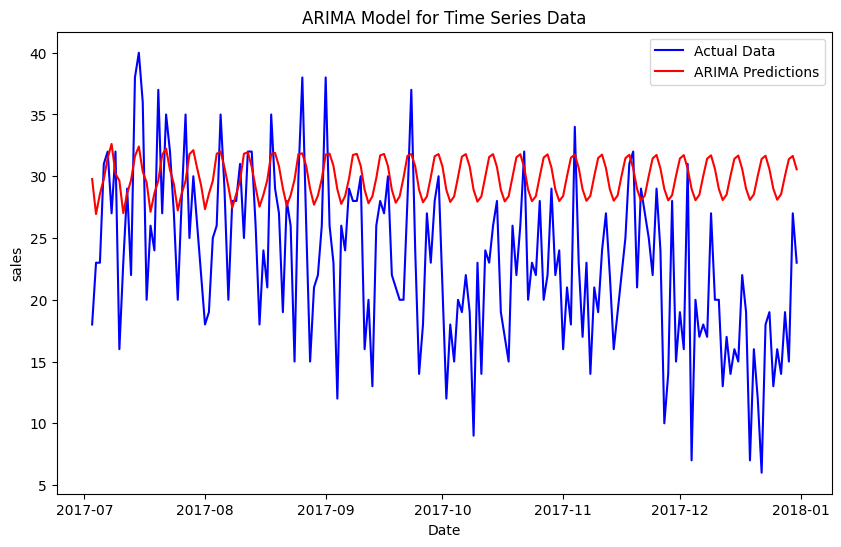

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['sales'], label='Actual Data', color='blue')
plt.plot(predictions.index, predictions, label='ARIMA Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('ARIMA Model for Time Series Data')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
mse = (mean_squared_error(test['sales'], predictions))
print("Mean Squared Error:", mse)

Mean Squared Error: 84.91995926353059
